In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

PROJECT_DIR = '/Users/nattapolchanpaisit/Documents/GitHub/Algorithm/SC1015-PROJECT/'
PROJECT_DIR_SETA = f'{PROJECT_DIR}/dataset/set_a'
PROJECT_DIR_SETB = f'{PROJECT_DIR}/dataset/set_b'
data_a_path = pd.read_csv(f'{PROJECT_DIR}dataset/set_a.csv')
data_b_path = pd.read_csv(f'{PROJECT_DIR}dataset/set_b.csv')
data_a_timing = pd.read_csv(f'{PROJECT_DIR}dataset/set_a_timing.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'set_a/normal__201102081321.wav'),
  Text(1, 0, 'set_a/normal__201102260502.wav'),
  Text(2, 0, 'set_a/normal__201103090635.wav'),
  Text(3, 0, 'set_a/normal__201103140132.wav'),
  Text(4, 0, 'set_a/normal__201103140822.wav'),
  Text(5, 0, 'set_a/normal__201103151912.wav'),
  Text(6, 0, 'set_a/normal__201103221214.wav'),
  Text(7, 0, 'set_a/normal__201104141251.wav'),
  Text(8, 0, 'set_a/normal__201105011626.wav'),
  Text(9, 0, 'set_a/normal__201105021654.wav'),
  Text(10, 0, 'set_a/normal__201105021804.wav'),
  Text(11, 0, 'set_a/normal__201105151450.wav'),
  Text(12, 0, 'set_a/normal__201106111136.wav'),
  Text(13, 0, 'set_a/normal__201106141148.wav'),
  Text(14, 0, 'set_a/normal__201106210943.wav'),
  Text(15, 0, 'set_a/normal__201106221418.wav'),
  Text(16, 0, 'set_a/normal__201106221450.wav'),
  Text(17, 0, 'set_a/normal__201108011112.wav'),
  Text(18, 0, 'set_a/norma

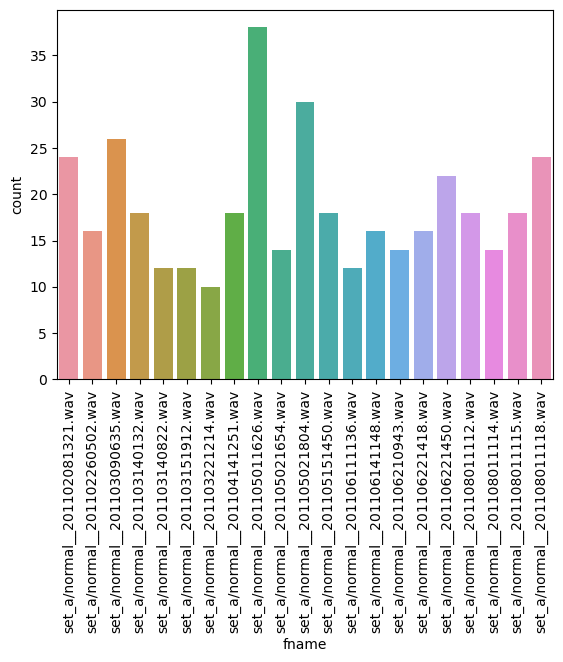

In [2]:
sb.countplot(data_a_timing, x='fname')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'heart desease label')

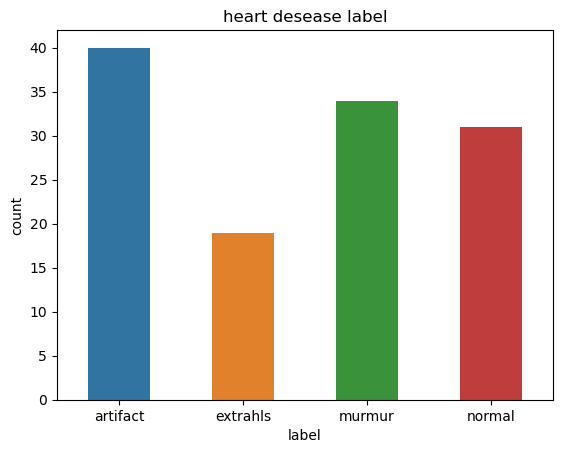

In [3]:
sb.countplot(data_a_path, x='label', width=0.5)
plt.title('heart desease label')

/var/folders/mk/w2mwvrjn5sn9g2fty5rrgzd40000gn/T/ipykernel_86719/170591785.py:6: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(data, samplerate)


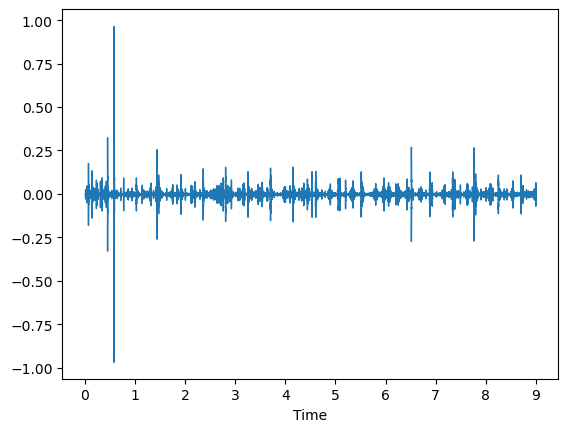

In [5]:
import scipy
import librosa
import librosa.display
# /Users/nattapolchanpaisit/Documents/GitHub/Algorithm/SC1015-PROJECT/dataset/set_a/
data, samplerate = librosa.load(f'{PROJECT_DIR}dataset/set_a/normal__201104122156.wav')
librosa.display.waveshow(data, samplerate)
# librosa.display.specshow(data)

/Users/nattapolchanpaisit/miniforge3/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


(array([], dtype=float64), [])

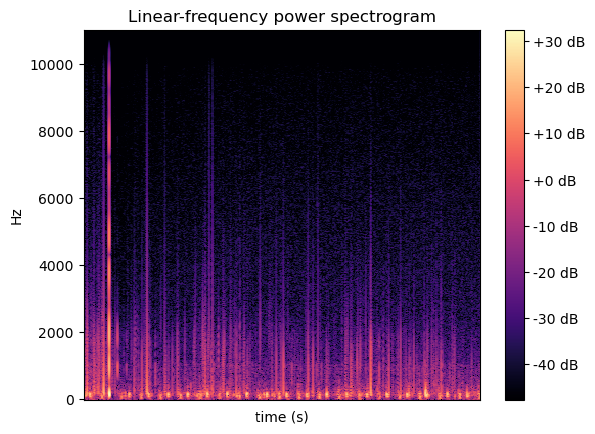

In [6]:
fft = librosa.amplitude_to_db(librosa.stft(data))
librosa.display.specshow(fft, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.xlabel('time (s)')
plt.xticks()

In [76]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import matplotlib
import matplotlib.pyplot as plt

class set_b_dataset(Dataset):
    def __init__(self, path: str):
        super().__init__()
        self.path = path
        self.metadata = pd.read_csv(f'{PROJECT_DIR}dataset/set_b.csv')
        self.filenames = []
        for name in self.metadata['fname']: 
            if 'Bunlabelled' not in name: 
                self.filenames.append(name)
        self.dataset = []
        self.fft = []
        for fn in self.filenames:
            data, samplerate = librosa.load(f'{PROJECT_DIR}dataset/{fn}')
            self.dataset.append([data, samplerate])
            self.fft.append(librosa.amplitude_to_db(librosa.stft(data)))
        
    def __len__(self) -> int:
        return len(self.landmarks_frame)

    def __getitem__(self, idx: int) -> tuple[np.ndarray, int]:
        return self.dataset[idx][0], self.dataset[idx][1]
        
    def show_wave(self, idx: int, **kwargs) -> librosa.display.AdaptiveWaveplot:
        return librosa.display.waveshow(self.dataset[idx][0], sr=self.dataset[idx][1], *kwargs)
    
    def show_spec(self, idx: int, **kwargs) -> matplotlib.collections.QuadMesh:
        return librosa.display.specshow(self.fft[idx], *kwargs)
    
    def denoise(self) -> None:
        # denoise function
        
        

In [77]:
data = set_b_dataset(path='/Users/nattapolchanpaisit/Documents/GitHub/Algorithm/SC1015-PROJECT/dataset/set_b.csv')

/Users/nattapolchanpaisit/miniforge3/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


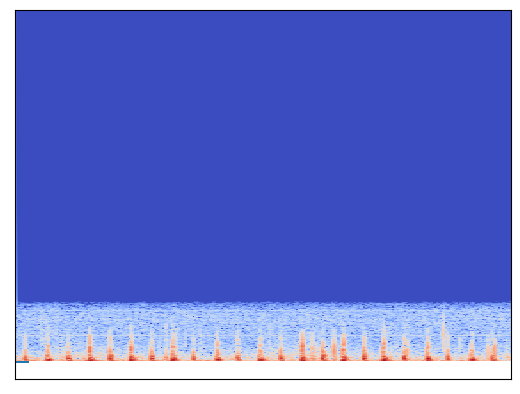

In [78]:
data.show_wave(10)
data.show_spec(10)

In [13]:
/Users/nattapolchanpaisit/Documents/GitHub/Algorithm/SC1015-PROJECT/dataset/set_b/extrastole__127_1306764300147_C2.wav
/Users/nattapolchanpaisit/Documents/GitHub/Algorithm/SC1015-PROJECT/dataset/set_b/extrastole_127_1306764300147_C2.wav
len(data)

TypeError: object of type 'NoneType' has no len()

utils/

In [ ]:
def plot_spectrogram(data):
    fft = librosa.amplitude_to_db(librosa.stft(data))
    librosa.display.specshow(fft, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectrogram')
    plt.xlabel('time (s)')
    plt.xticks()